In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import gridspec
import ast
import os
os.chdir('/home/bojk/Data/') #this is when opened in '/home/bojk/Data/notebooks' on linux Quakelab
import sys
sys.path.append('/home/bojk/Data/minimeta_pyfiles/')
import imp
import minimetagenome_analysis as minimeta
#imp.reload(minimeta)

import reassembly as rea
import subcluster_bins as sub
import checkm_out_plot as cop
import checkm_out as co

In [168]:
#load OP 3 maindf
OP3 = pd.read_pickle('Obsidian_Pool/maindfs_withclusters/Obsidian3All_maindf')
OP2 = pd.read_pickle('Obsidian_Pool/maindfs_withclusters/Obsidian2All_maindf')
OP6 = pd.read_pickle('Obsidian_Pool/maindfs_withclusters/Obsidian6All_maindf')
OP6_1 = pd.read_pickle('Obsidian_Pool/maindfs_withclusters/Obsidian6_megahit_HDB_maindf')
OP6_2 = pd.read_pickle('Obsidian_Pool/maindfs_withclusters/Obsidian6_metaSpades_HDB_maindf')
OP6_3 = pd.read_pickle('Obsidian_Pool/maindfs_withclusters/Obsidian6_minimeta_HDB_maindf')
OP4 = pd.read_pickle('Obsidian_Pool/maindfs_withclusters/Obsidian4All_maindf')
OP3.head(2)

,Scaffold ID,Scaffold Name,Genome ID,Genome,Gene Count,Sequence Length,GC Content,Read Depth,Lineage Domain,Lineage Phylum,...,H03,H04,H05,H06,H07,H08,H09,H10,H11,H12
0,3300017562 assembled Ga0186926,10001,megahit,Hotspring sediment microbial communities from ...,9,9710,0.69,1,Bacteria,Proteobacteria,...,0,0,0.00659114,0.0163749,0,0,0,0,0,0
1,3300017562 assembled Ga0186926,10002,megahit,Hotspring sediment microbial communities from ...,10,7796,0.61,1,Archaea,Crenarchaeota,...,0,0,0,0,0,0,0,0,0,0


In [7]:
PFFB = pd.read_pickle('Permafrost/FranklinBluffs/pickles/maindf_withDepth')
PFFB.shape

(58854, 50)

In [8]:
OP3.shape

(6010, 118)

In [31]:
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator

In [81]:
 OP6['Lineage Phylum'].value_counts()

Crenarchaeota                  3738
Unassigned                     2051
Candidatus Micrarchaeota        312
Euryarchaeota                   302
Aquificae                       212
Proteobacteria                  172
Thaumarchaeota                  146
Nanoarchaeota                   115
dsDNA viruses, no RNA stage      84
Firmicutes                       23
Candidatus Bathyarchaeota         7
Candidatus Parvarchaeota          4
Nitrospirae                       1
Aigarchaeota                      1
Calescamantes                     1
Actinobacteria                    1
Name: Lineage Phylum, dtype: int64

(-0.5, 399.5, 199.5, -0.5)

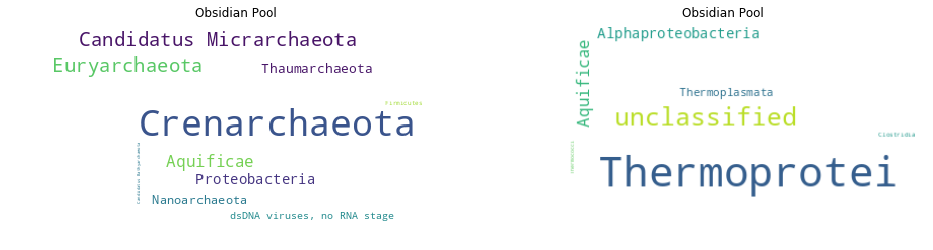

In [87]:
fig, ax = plt.subplots(figsize = (16, 12))
plt.subplot(1, 2, 1)

stopwords = set(['Unassigned','Candidatus'])
text_cat = " ".join(review for review in OP6['Lineage Phylum'].dropna())
text_dict = OP6['Lineage Phylum'].value_counts()[:].to_dict()
text_dict.pop('Unassigned',None)
wordcloud = WordCloud(max_font_size=None, background_color='white',stopwords=stopwords,
                      collocations=False).generate_from_frequencies(text_dict)#generate(text_cat)
plt.imshow(wordcloud)#,interpolation='bilinear')
plt.title('Obsidian Pool')
plt.axis("off")

plt.subplot(1, 2, 2)
stopwords = set(['Unassigned'])
text_cat = " ".join(review for review in OP6['Lineage Class'].dropna())
wordcloud = WordCloud(max_font_size=None, background_color='white',stopwords=stopwords,
                      collocations=False).generate(text_cat)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Obsidian Pool')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

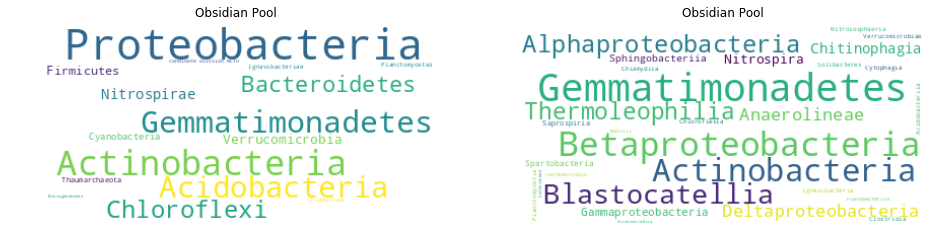

In [85]:
fig, ax = plt.subplots(figsize = (16, 12))
plt.subplot(1, 2, 1)
stopwords = set(['Unassigned','unclassified'])
text_cat = " ".join(review for review in PFFB['Lineage Phylum'].dropna())
text_dict = PFFB['Lineage Phylum'].value_counts().to_dict()
text_dict.pop('Unassigned',None)
wordcloud = WordCloud(max_font_size=None, background_color='white',stopwords=stopwords,
                      collocations=False).generate_from_frequencies(text_dict)#generate(text_cat)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Obsidian Pool')
plt.axis("off")

plt.subplot(1, 2, 2)
#stopwords = set(['Unassigned'])
text_cat = " ".join(review for review in PFFB['Lineage Class'].dropna())
wordcloud = WordCloud(max_font_size=None, background_color='white',stopwords=stopwords,
                      collocations=False).generate(text_cat)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Obsidian Pool')
plt.axis("off")

In [38]:
from PIL import Image
mask = np.array(Image.open("../Downloads/20756109_2.jpg.png"))
image_colors = ImageColorGenerator(mask)

(-0.5, 1333.5, 1439.5, -0.5)

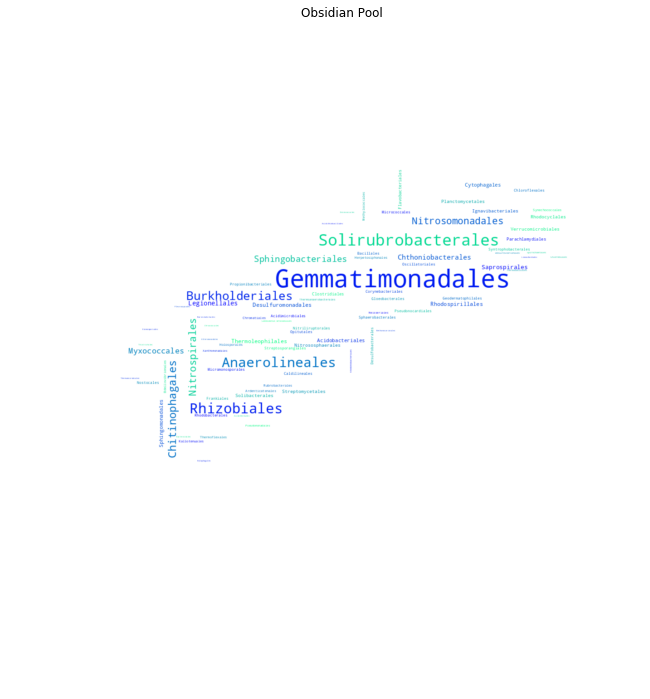

In [102]:
fig, ax = plt.subplots(figsize = (16, 12))
#plt.subplot(1, 2, 1)
plt.subplot(111)
wordcloud = WordCloud(max_font_size=None, background_color='white',colormap='winter',mask=mask,stopwords=stopwords,
                      ).generate_from_frequencies(text_dict)#generate(text_cat)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Obsidian Pool')
plt.axis("off")

In [51]:
PFFB['Lineage Class'].value_counts()
string

NameError: name 'string' is not defined

In [56]:
string = [f.split('')[0] for f in list(PFFB['Lineage Phylum'].dropna().values)]

ValueError: empty separator

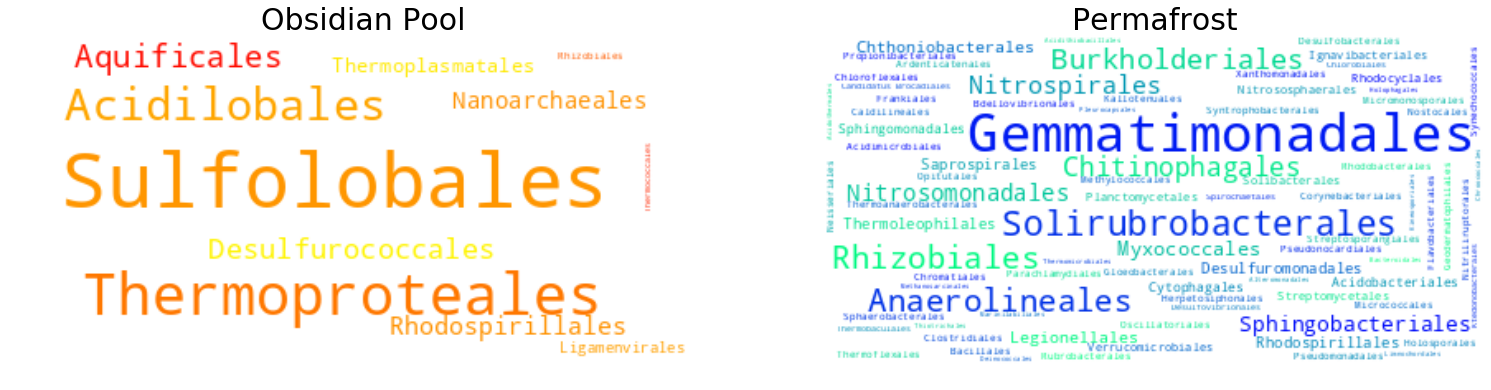

In [107]:
OP2['Lineage Order'].value_counts()[:].to_dict()
#wordcloud.words_
PFFB['Lineage Order'].value_counts().to_dict()

fig, ax = plt.subplots(figsize = (26, 22))
plt.subplot(1, 2, 1)
#stopwords = set(['Unassigned','unclassified'])
#text_cat = " ".join(review for review in PFFB['Lineage Phylum'].dropna())
text_dict = OP6['Lineage Order'].value_counts().to_dict()
text_dict.pop('Unassigned',None)
text_dict.pop('unclassified',None)
wordcloud = WordCloud(max_font_size=None, background_color='white',colormap='autumn',stopwords=stopwords,
                      collocations=False).generate_from_frequencies(text_dict)#generate(text_cat)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Obsidian Pool',fontsize=30)
plt.axis("off")

plt.subplot(1, 2, 2)
#stopwords = set(['Unassigned'])
text_dict = PFFB['Lineage Order'].value_counts().to_dict()
text_dict.pop('Unassigned',None)
text_dict.pop('unclassified',None)

wordcloud = WordCloud(max_font_size=None, background_color='white',colormap='winter',stopwords=stopwords,
                      collocations=False).generate_from_frequencies(text_dict)
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('Permafrost',fontsize=30)
plt.axis("off")


fig.savefig('Permafrost/group_meetingFeb2019/wordcloud_orders.png')
fig.savefig('Permafrost/group_meetingFeb2019/wordcloud_orders.pdf')

In [108]:
len(PFFB)

58854

In [109]:
PFFB['Sequence Length'].median()

6896.0

In [110]:
PFFB['Sequence Length'].sum()

505597217

In [111]:
len(OP6)

7170

In [112]:
OP6['Sequence Length'].median()

7694.5

In [113]:
OP6['Sequence Length'].sum()

77232712

In [115]:
len(OP6[OP6['Genome ID'].isin(['metaSPAdes','minimetagenomics'])])

5150

In [116]:
OP6[OP6['Genome ID'].isin(['metaSPAdes','minimetagenomics'])].median()

Scaffold Name      14595.500000
Gene Count            10.000000
Sequence Length     8172.000000
GC Content             0.440000
well_counts            0.000000
k4_x                  -6.087441
k4_y                   1.626193
k5_x                   3.634228
k5_y                  -5.137902
dtype: float64

In [117]:
OP6[OP6['Genome ID'].isin(['metaSPAdes','minimetagenomics'])].sum()

Scaffold ID           3300017696 assembled Ga01873103300017696 assem...
Scaffold Name                                                  75166825
Genome ID             metaSPAdesmetaSPAdesmetaSPAdesmetaSPAdesmetaSP...
Genome                Hotspring sediment microbial communities from ...
Gene Count                                                        68302
Sequence Length                                                60182846
GC Content                                                      2309.19
Read Depth            1111111111111111111111111111111111111111111111...
Lineage Domain        ArchaeaArchaeaArchaeaArchaeaArchaeaArchaeaArch...
Lineage Phylum        EuryarchaeotaCrenarchaeotaCrenarchaeotaCrenarc...
Lineage Class         UnassignedThermoproteiThermoproteiThermoprotei...
Lineage Order         UnassignedDesulfurococcalesSulfolobalesSulfolo...
Lineage Family        UnassignedunclassifiedSulfolobaceaeunclassifie...
Lineage Genus         UnassignedunclassifiedSulfolobusunclassifi

In [119]:
PFFB['Gene Count'].sum()

532775

In [187]:
import matplotlib as mpl
mpl.rcParams['axes.labelsize'] = 15
mpl.rcParams['xtick.labelsize'] = 22
mpl.rcParams['ytick.labelsize'] = 22
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['figure.titlesize'] = 30
mpl.rcParams['legend.fontsize'] = 14

aran = [1.00,.90,.80,.70,.60,.50,.40,.30,.20,.10,.08,.06,.04,.02,.01,.005]
alpha=.1

for alph in aran:
    alpha= alph
    f = plt.figure(figsize=(20,10))
    gs= gridspec.GridSpec(1,2)

    ax1 = f.add_subplot(gs[0,0])
    OP6.plot.scatter('k5_x','k5_y',s=OP6['Sequence Length'].divide(1e2),alpha=alpha,ax=ax1,c='gray')
    plt.ylabel('');plt.xlabel('')
    plt.title('Obsidian Pool 6')

    ax2 = f.add_subplot(gs[0,1])
    PFFB.plot.scatter('x_70_a','y_70_a',s=PFFB['Sequence Length'].divide(1e2),alpha=alpha,ax=ax2,c='gray')   
    plt.ylabel('');plt.xlabel('')
    plt.title('Permafrost FranklinBluffs')

    plt.suptitle('Alpha = '+str(alpha))
    f.savefig('/home/bojk/Data/Permafrost/group_meetingFeb2019/tsne/tSNE_comp_alpha_'+'%.3f.png' % alpha)
    plt.close(f)

In [188]:
import imageio
import glob
imdir = 'Permafrost/group_meetingFeb2019/tsne/'
#files = glob.glob('*.png')
files = [f for f in os.listdir(imdir) if '.png' in f]
files = np.sort(files)
# make a copy of each image to slow down gif by factor 2
from shutil import copyfile
for file in files:
    copyfile(imdir+file, imdir+file.split('.')[0]+'.'+file.split('.')[1]+'_1.png')
#files = glob.glob('*.png')
files = [f for f in os.listdir(imdir) if '.png' in f]
files = np.sort(files)[::-1]
images = []
for file in files:
    # imageio.imread(file) creates a numpy matrix array
    # In this case a 200 x 200 matrix for every file, since the files are 200 x 200 pixels.
    images.append(imageio.imread(imdir+file))
    print(file)
imageio.mimsave(imdir+'tSNE_comparison.gif', images)

tSNE_comp_alpha_1.000_1.png
tSNE_comp_alpha_1.000.png
tSNE_comp_alpha_0.900_1.png
tSNE_comp_alpha_0.900.png
tSNE_comp_alpha_0.800_1.png
tSNE_comp_alpha_0.800.png
tSNE_comp_alpha_0.700_1.png
tSNE_comp_alpha_0.700.png
tSNE_comp_alpha_0.600_1.png
tSNE_comp_alpha_0.600.png
tSNE_comp_alpha_0.500_1.png
tSNE_comp_alpha_0.500.png
tSNE_comp_alpha_0.400_1.png
tSNE_comp_alpha_0.400.png
tSNE_comp_alpha_0.300_1.png
tSNE_comp_alpha_0.300.png
tSNE_comp_alpha_0.200_1.png
tSNE_comp_alpha_0.200.png
tSNE_comp_alpha_0.100_1.png
tSNE_comp_alpha_0.100.png
tSNE_comp_alpha_0.080_1.png
tSNE_comp_alpha_0.080.png
tSNE_comp_alpha_0.060_1.png
tSNE_comp_alpha_0.060.png
tSNE_comp_alpha_0.040_1.png
tSNE_comp_alpha_0.040.png
tSNE_comp_alpha_0.020_1.png
tSNE_comp_alpha_0.020.png
tSNE_comp_alpha_0.010_1.png
tSNE_comp_alpha_0.010.png
tSNE_comp_alpha_0.005_1.png
tSNE_comp_alpha_0.005.png


In [151]:
print('%.3f' % alph)

1.000


In [177]:
OP6_1.DBclusternum.max()

33

In [178]:
OP6_1['Bin'] = ["{0:0=3d}".format(f) if f>=0 else f for f in OP6_1.DBclusternum]
OP6_2['Bin'] = ["{0:0=3d}".format(f+OP6_1.DBclusternum.max()+1) if f>=0 else f for f in OP6_2.DBclusternum]
OP6_3['Bin'] = ["{0:0=3d}".format(f+OP6_1.DBclusternum.max()+OP6_2.DBclusternum.max()+1) if f>=0 else f for f in OP6_3.DBclusternum]

In [180]:
OP6_all = OP6_1.set_index('Scaffold Name').append(OP6_2.set_index('Scaffold Name').append(OP6_3.set_index('Scaffold Name')))

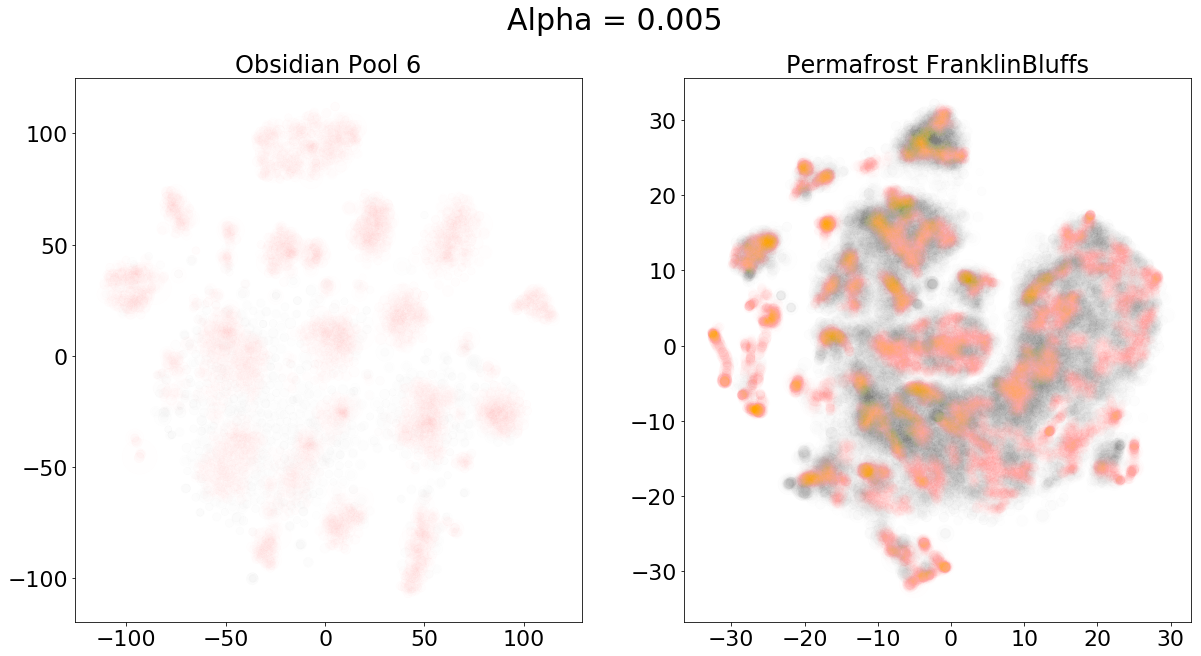

In [191]:
f = plt.figure(figsize=(20,10))
gs= gridspec.GridSpec(1,2)
alpha=.005
ax1 = f.add_subplot(gs[0,0])
OP6_all[OP6_all.Bin==-1].plot.scatter('k5_x','k5_y',s=OP6['Sequence Length'].divide(1e2),alpha=alpha,ax=ax1,c='gray')
OP6_all[OP6_all.Bin!=-1].plot.scatter('k5_x','k5_y',s=OP6['Sequence Length'].divide(1e2),alpha=alpha,ax=ax1,c='orange')
plt.ylabel('');plt.xlabel('')
plt.title('Obsidian Pool 6')

ax2 = f.add_subplot(gs[0,1])
PFFB[PFFB.DBclusternum==-1].plot.scatter('x_70_a','y_70_a',s=PFFB['Sequence Length'].divide(1e2),alpha=alpha,ax=ax2,c='gray')   
PFFB[PFFB.DBclusternum!=-1].plot.scatter('x_70_a','y_70_a',s=PFFB['Sequence Length'].divide(1e2),alpha=alpha,ax=ax2,c='orange')   
plt.ylabel('');plt.xlabel('')
plt.title('Permafrost FranklinBluffs')

plt.suptitle('Alpha = '+str(alpha))
f.savefig('/home/bojk/Data/Permafrost/group_meetingFeb2019/tsne/tSNE_clustered_comp_alpha_'+'%.3f.png' % alpha)
#plt.close(f)

In [184]:
PFFB

,Scaffold ID,Scaffold Name,Genome ID,Genome,Gene Count,Sequence Length,GC Content,Read Depth,Lineage Domain,Lineage Phylum,...,y_50_n,y_60_a,y_60_n,y_70_a,y_70_n,y_80_a,y_80_n,DBclusternum,Bin,sampling depth
SuperContig_k91_534_flag=1_multi=8.0003_len=14225_FranklinBluffs_40cm_Bulk,3300019790 assembled Ga0198867_100002,100002,3300019790,Permafrost soil microbial communities from Fra...,14,14225,0.67,1,Bacteria,Gemmatimonadetes,...,1.153617,2.954112,4.216885,-13.427721,5.764274,-3.659723,-0.926016,146,146,40cm
SuperContig_k91_754_flag=0_multi=12.0033_len=15741_FranklinBluffs_40cm_Bulk,3300019790 assembled Ga0198867_100005,100005,3300019790,Permafrost soil microbial communities from Fra...,11,15741,0.71,1,Bacteria,Unassigned,...,-10.119719,-16.110674,5.397628,1.254670,1.925289,-18.390173,9.912577,157,157,40cm
SuperContig_k91_925_flag=0_multi=7.5024_len=17916_FranklinBluffs_40cm_Bulk,3300019790 assembled Ga0198867_100010,100010,3300019790,Permafrost soil microbial communities from Fra...,17,17916,0.65,1,Bacteria,Unassigned,...,-0.356816,7.380581,1.747532,-8.857802,10.268993,4.486896,-7.312331,133,133,40cm
SuperContig_k91_1864_flag=0_multi=14.3799_len=29183_FranklinBluffs_40cm_Bulk,3300019790 assembled Ga0198867_100021,100021,3300019790,Permafrost soil microbial communities from Fra...,31,29183,0.61,1,Bacteria,Unassigned,...,7.827092,-3.573904,-2.977007,-16.693713,14.412263,5.860544,-6.327385,66,066,40cm
SuperContig_k91_2434_flag=1_multi=18.9378_len=21104_FranklinBluffs_40cm_Bulk,3300019790 assembled Ga0198867_100028,100028,3300019790,Permafrost soil microbial communities from Fra...,18,21104,0.7,1,Bacteria,Actinobacteria,...,-5.697447,-11.203955,7.502133,-2.727186,-3.401343,-12.522949,6.876188,142,142,40cm
SuperContig_k91_2535_flag=0_multi=8.4199_len=16593_FranklinBluffs_40cm_Bulk,3300019790 assembled Ga0198867_100031,100031,3300019790,Permafrost soil microbial communities from Fra...,19,16593,0.62,1,Bacteria,Gemmatimonadetes,...,0.567957,10.631544,-4.808173,-5.104294,9.859611,9.984331,-2.811865,127,127,40cm
SuperContig_k91_2677_flag=1_multi=9.7744_len=15639_FranklinBluffs_40cm_Bulk,3300019790 assembled Ga0198867_100032,100032,3300019790,Permafrost soil microbial communities from Fra...,16,15639,0.58,1,Bacteria,Nitrospirae,...,9.915347,9.091612,-13.412711,1.238126,0.882085,14.076608,5.620568,56,056,40cm
SuperContig_k91_3712_flag=0_multi=10.0607_len=15698_FranklinBluffs_40cm_Bulk,3300019790 assembled Ga0198867_100043,100043,3300019790,Permafrost soil microbial communities from Fra...,17,15698,0.65,1,Bacteria,Unassigned,...,-9.066734,11.629001,-6.936642,-5.731406,-3.946196,5.799499,6.456562,150,150,40cm
SuperContig_k91_4582_flag=0_multi=15.1432_len=12132_FranklinBluffs_40cm_Bulk,3300019790 assembled Ga0198867_100049,100049,3300019790,Permafrost soil microbial communities from Fra...,14,12132,0.7,1,Bacteria,Proteobacteria,...,2.929431,-4.143073,15.538382,-6.136761,-7.644384,-10.188556,1.384553,-1,-01,40cm
SuperContig_k91_5067_flag=0_multi=13.0715_len=16335_FranklinBluffs_40cm_Bulk,3300019790 assembled Ga0198867_100054,100054,3300019790,Permafrost soil microbial communities from Fra...,12,16335,0.71,1,Bacteria,Unassigned,...,-6.949941,-14.201571,7.448987,0.151193,-1.825589,-16.864209,10.604658,116,116,40cm
